In [91]:
import pandas as pd
import seaborn 

In [92]:
df2 = pd.read_csv('../data/output_data/output_fire_data/viirs-snpp_2012_Australia.csv')
df3 = pd.read_csv('../data/output_data/output_fire_data/viirs-snpp_2013_Australia.csv')
df4 = pd.read_csv('../data/output_data/output_fire_data/viirs-snpp_2014_Australia.csv')
df5 = pd.read_csv('../data/output_data/output_fire_data/viirs-snpp_2015_Australia.csv')
df6 = pd.read_csv('../data/output_data/output_fire_data/viirs-snpp_2016_Australia.csv')
df7 = pd.read_csv('../data/output_data/output_fire_data/viirs-snpp_2017_Australia.csv')
df8 = pd.read_csv('../data/output_data/output_fire_data/viirs-snpp_2018_Australia.csv')
df9 = pd.read_csv('../data/output_data/output_fire_data/viirs-snpp_2019_Australia.csv')

In [93]:
df = pd.concat([df2,df3,df4,df5,df6,df7,df8,df9]).reset_index().drop('index',axis=1)
df

,latitude,longitude,bright_ti4,confidence,bright_ti5,frp
0,-37.150917,141.167313,367.0,h,325.47,42.05
1,-37.197845,149.030838,367.0,h,295.09,31.46
2,-38.210865,141.848984,367.0,h,328.89,40.54
3,-38.612350,143.158524,367.0,h,305.75,31.98
4,-37.218739,144.196091,367.0,h,307.47,14.79
...,...,...,...,...,...,...
1871,-37.627838,147.772354,367.0,h,293.01,6.34
1872,-37.413429,148.882416,367.0,h,293.59,7.40
1873,-37.513348,149.758514,367.0,h,297.53,7.57
1874,-37.424419,149.575745,367.0,h,295.39,6.17


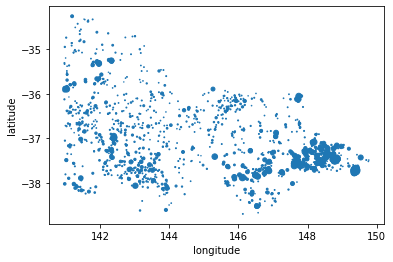

In [97]:
df.plot.scatter(y = 'latitude',x = 'longitude',s = df['frp']/15)

In [53]:
import folium
from folium.plugins import HeatMap

In [110]:
map_osm = folium.Map(locations=[-37,135],zoom_start=5,tiles="Stamen Terrain")
heat_df=df[['latitude','longitude','frp']]
# heat_df['frp']=heat_df['frp']/10
heat_df

,latitude,longitude,frp
0,-37.150917,141.167313,42.05
1,-37.197845,149.030838,31.46
2,-38.210865,141.848984,40.54
3,-38.612350,143.158524,31.98
4,-37.218739,144.196091,14.79
...,...,...,...
1871,-37.627838,147.772354,6.34
1872,-37.413429,148.882416,7.40
1873,-37.513348,149.758514,7.57
1874,-37.424419,149.575745,6.17


In [118]:

HeatMap(df9[['latitude','longitude','frp']],).add_to(map_osm)
map_osm

In [119]:
from sklearn.cluster import KMeans

In [120]:
n_clus = 100
kmeans = KMeans(n_clusters=n_clus)

In [121]:
kmeans.fit(df[['longitude','latitude']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

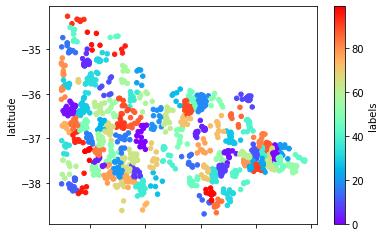

In [122]:
df['labels'] = kmeans.labels_
df.plot.scatter(x='longitude',y='latitude',c='labels',cmap='rainbow')

In [146]:
fire_size_clustered=[]
for i in range(0,n_clus):
    l = []
    l.append(kmeans.cluster_centers_[i])
    df_label = df[df['labels']==i]
    l.append(df_label.sum()['frp'])
    fire_size_clustered.append(l)
center_latitude=[]
center_longitude=[]
center_size=[]
for i in range(0,n_clus):
    center_longitude.append(fire_size_clustered[i][0][0])
    center_latitude.append(fire_size_clustered[i][0][1])
    center_size.append(fire_size_clustered[i][1])
fire_clus = pd.DataFrame()
fire_clus['latitude'] = center_latitude
fire_clus['longitude'] = center_longitude
fire_clus['frp'] = center_size
fire_clus['frp']=fire_clus['frp']/50
fire_clus


,latitude,longitude,frp
0,-36.979083,143.869362,9.0278
1,-37.395876,148.702175,61.1422
2,-36.360385,141.245716,10.0394
3,-37.326302,146.998582,17.1700
4,-37.521991,142.326735,13.3154
...,...,...,...
95,-35.033808,143.126835,1.2592
96,-38.101039,141.752253,6.5914
97,-34.821044,142.132761,3.4122
98,-38.242735,146.371048,21.8620


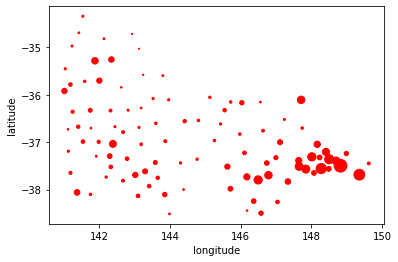

In [147]:
fire_clus.plot.scatter(x='longitude',y='latitude',s=fire_clus['frp'],c='red')

In [148]:
clustering_fire_data="../data/output_data/output_fire_data/clustering_fire_data.csv"
fire_clus.to_csv(clustering_fire_data,index=False,encoding='utf-8')